In [61]:
!pip install matplotlib seaborn --upgrade --quiet

# Loan Approval Data Analysis

### Importing all the libraries to be used

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy.stats import chi2_contingency

### Reading the csv file using pandas

In [63]:
df1 = pd.read_csv("/Users/vanshtrivedi/Downloads/archive 3/loan_approval.csv")
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [65]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Ploting a pair plot of each integer or float type data to get an overview of data set

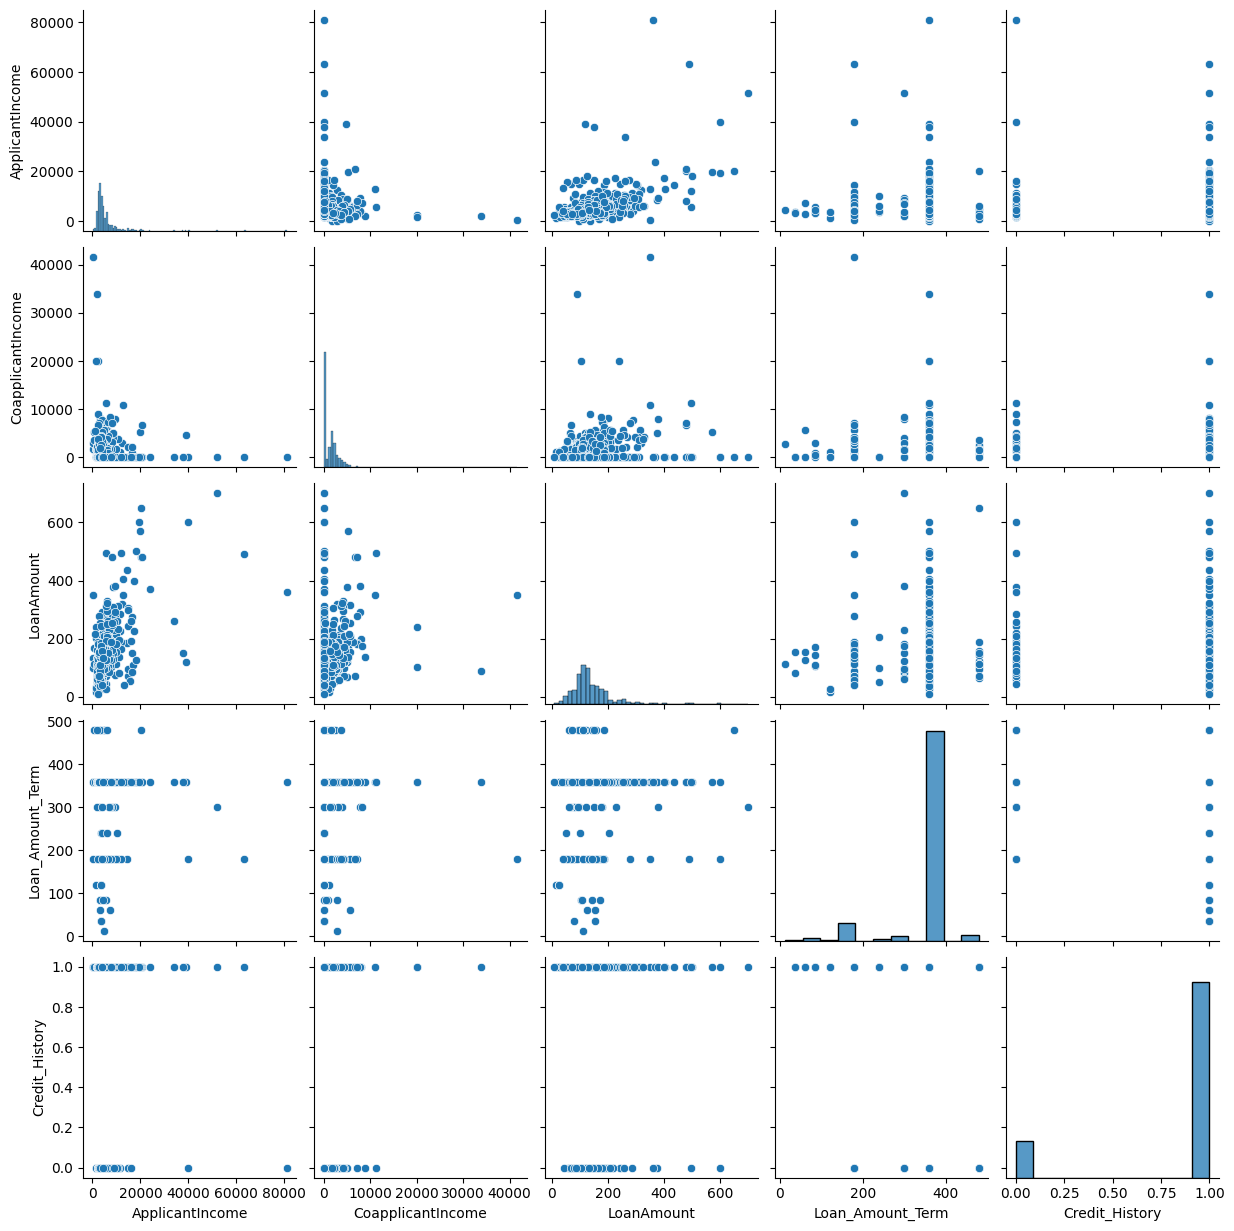

In [66]:
sns.pairplot(df1)

### Displaying applicant income to get an overview of applicants income

In [67]:
applicant_income=df1['ApplicantIncome']
applicant_income

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64

### Checking for the unique values so that undesirable values can be adjusted 

In [68]:
loan_status=df1['Loan_Status']
loan_status.unique()

array(['Y', 'N'], dtype=object)

### Converting the field "Loan status" from object type to integer type so that it can be plotted

In [69]:
list_loan=df1['Loan_Status'].copy()
for i in range(len(list_loan)):
    if list_loan[i]=='Y':
        list_loan[i]=1
    else:
        list_loan[i]=0
print(list_loan)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: object


### Plotting "Loan Status" against "Applicant Income" using scatter plot to get an overview of successful loan status

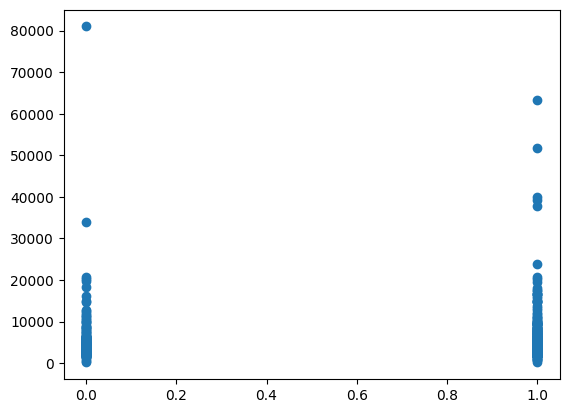

In [70]:
plt.scatter(list_loan,applicant_income)
plt.show()

### Conclusion:-The applicant for the loan approval whose income ranges from 0 to 20000 has nearly the same chances for loan approval and loan disapproval.

### Plotting Applicant Income against Loan Status in Y and N format of Loan Status

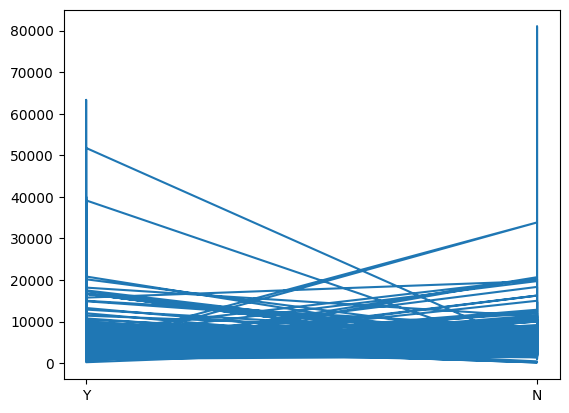

In [71]:
plt.plot(loan_status,applicant_income)

### Plotting "Coapplicant Income" for each applicant 

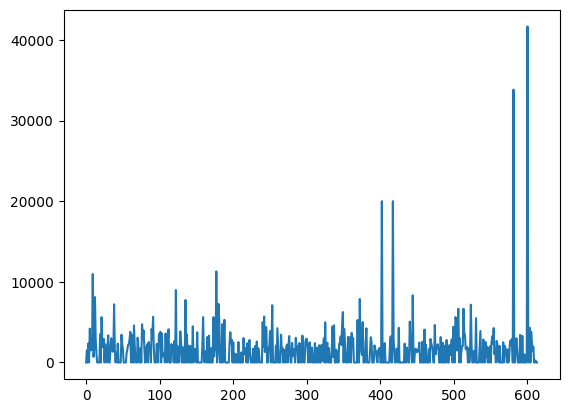

In [72]:
coapplicant_income=df1['CoapplicantIncome']
plt.plot(coapplicant_income)

### Plotting a graph of Loan Amount of each applicant 

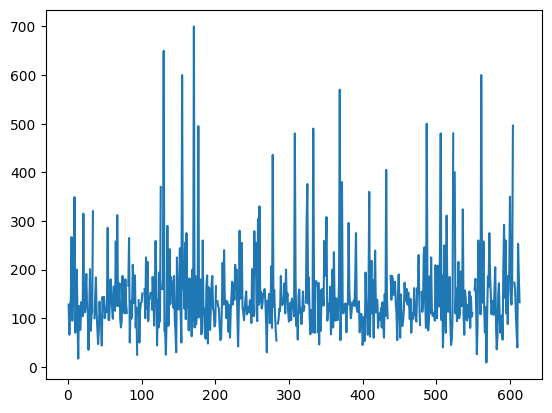

In [73]:
loan_amount=df1['LoanAmount']
plt.plot(loan_amount)

### Checking the unique values in the field "Dependents" so that undesired values can be corrected like in this case '3+' is an undesired value

In [74]:
print(df1['Dependents'].unique())

['0' '1' '2' '3+' nan]


### Changing all the unique values in Dependent field using replace function

In [75]:
df1['Dependents'] = df1['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3})

### Describing the field Dependent and Loan Status using describe function

In [76]:
print(df1[['Dependents', 'Loan_Status']].describe())

       Dependents
count  599.000000
mean     0.762938
std      1.015216
min      0.000000
25%      0.000000
50%      0.000000
75%      2.000000
max      3.000000


### Plotting the number of dependents against Loan status using count plot to analyse the impact of number of dependents on loan status 

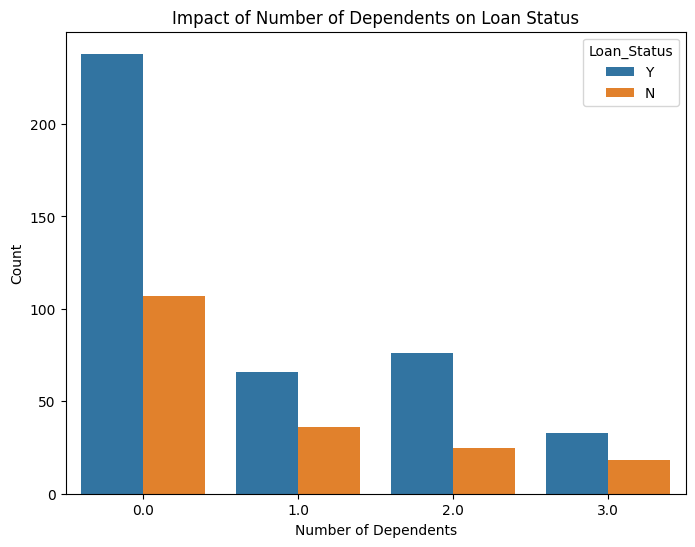

In [77]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='Dependents', hue='Loan_Status')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.title('Impact of Number of Dependents on Loan Status')
plt.show()

### Checking for the unique values in field "Gender"

In [78]:
Gender=df1['Gender']
Gender.unique()

array(['Male', 'Female', nan], dtype=object)

### Setting the value of male as 0 and that of female as 1 in field "Gender" using map function

In [79]:
df1['Gender'] = df1['Gender'].map({'Male': 0, 'Female': 1})

### Plotting fiels "Gender" against "Loan status"

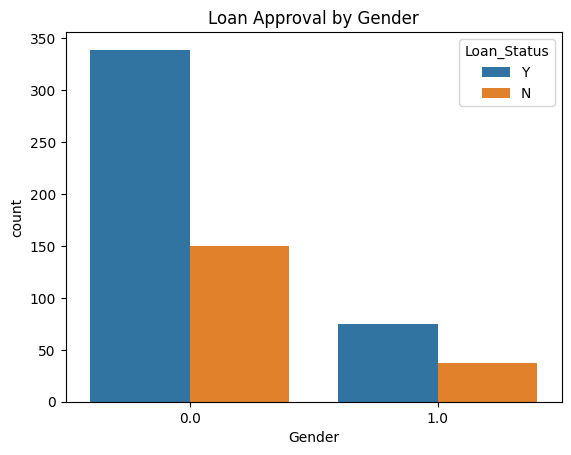

In [80]:
sns.countplot(x='Gender', hue='Loan_Status', data=df1)
plt.title('Loan Approval by Gender')
plt.show()

## Conclusion:-There are very high chances for male to get the loan approved in comparison with female